# 6.1.4 Generate Random Latitudes and Longitudes

## Create Latitude and Longitude Combinations

In [1]:
# Import dependencies
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from citipy import citipy

In [3]:
# Recreating the above cells, but using a loop to ensure sufficient cities

# Create list for holding cities
cities = []
min_cities = 500

while (len(cities) < min_cities):

    # Create a set of random latitude and longitude combinations
    list_length = min_cities*3

    lats = np.random.uniform(-90,90,size=list_length)
    lngs = np.random.uniform(-180,180,size=list_length)

    lat_lngs = zip(lats,lngs)

    coordinates = list(lat_lngs)

    # Identify nearest city for each latitude-longitude combination
    for coord in coordinates:
        city = citipy.nearest_city(coord[0], coord[1]).city_name

        # If city is unique, add it to cities list
        if city not in cities:
            cities.append(city)

len(cities)

575

# 6.2.6 Get the City Weather Data

## Import Dependencies, and Initialize an Empty List and Counters

In [4]:
# Import requests library
import requests

# Import API key
from config import weather_api_key

In [5]:
# Starting URL for Weather Map API Call
url = 'https://api.openweathermap.org/data/2.5/weather?units=Imperial&appid=' + weather_api_key

In [6]:
# Import time library and datetime module from datetime library 
import time
from datetime import datetime

## Loop Through the List of Cities and Build the City URL

### The next cell takes a minimum of ten minutes to run. Cells that follow (up until the relevant note below) are disabled to avoid this lengthy delay on subsequent runs.
# ▼Disable▼

# 6.2.7 Create a DataFrame of City Weather Data

# ▲Disable▲

### The next cell recreates a DataFrame from a previous run of the above disabled cells.

In [7]:
city_data_path = os.path.join('.','weather_data','cities.csv')

df_city_data = pd.read_csv(city_data_path)
df_city_data = df_city_data.set_index('City_ID')
df_city_data.index.name = None

df_city_data.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Beroroha,MG,2022-05-08 22:00:47,-21.6667,45.1667,68.68,79,0,1.86
1,Rikitea,PF,2022-05-08 22:00:47,-23.1203,-134.9692,76.37,77,78,19.69
2,Albany,US,2022-05-08 22:00:11,42.6001,-73.9662,63.88,29,100,1.01
3,Saint George,US,2022-05-08 21:57:19,37.1041,-113.5841,84.63,10,0,36.82
4,Atikokan,CA,2022-05-08 22:00:49,48.7555,-91.6216,48.70,93,100,13.33


# 6.3.1 Plot Latitude vs. Temperature

## Get Data for Plotting

In [8]:
# Extract relevant fields from the DataFrame for plotting
lats = df_city_data['Lat']
max_temps = df_city_data['Max Temp']
humidity = df_city_data['Humidity']
cloudiness = df_city_data['Cloudiness']
wind_speed = df_city_data['Wind Speed']

In [ ]:
%matplotlib inline

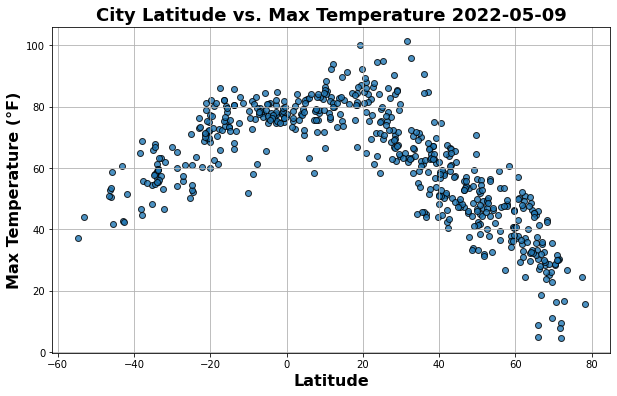

In [9]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature
fig, ax = plt.subplots(figsize=(10,6))

ax.scatter(
    lats,
    max_temps,
    label='Cities',
    marker='o',
    alpha=0.8,
    edgecolor='black',
    linewidths=1
)

# Incorporate the other graph properties.
# ax.set_title(f'City Latitude vs. Max Temperature '+ time.strftime('%x'))
ax.set_title(
    f'City Latitude vs. Max Temperature '+ time.strftime('%Y-%m-%d'),
    fontsize=18,
    fontweight='bold'
)
ax.set_ylabel(
    'Max Temperature (°F)',
    fontsize=16,
    fontweight='bold'
)
ax.set_xlabel(
    'Latitude',
    fontsize=16,
    fontweight='bold'
)
ax.grid()

# Save the figure.
plt.savefig(os.path.join('.','weather_data','fig1.png'))

# 6.3.2 Plot Latitude vs. Humidity

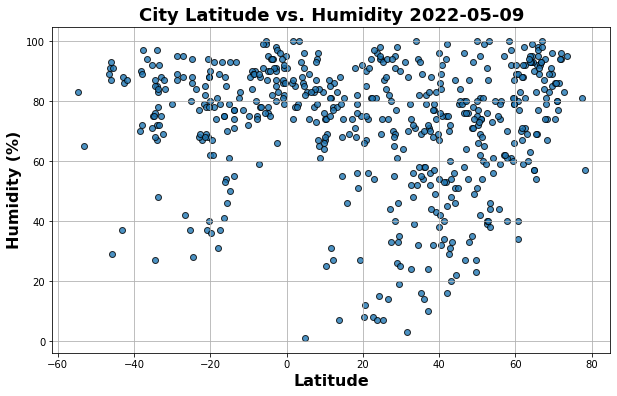

In [10]:
# Build the scatter plot for latitude vs. humidity
fig, ax = plt.subplots(figsize=(10,6))

ax.scatter(
    lats,
    humidity,
    label='Cities',
    marker='o',
    alpha=0.8,
    edgecolor='black',
    linewidths=1
)

# Incorporate the other graph properties.
ax.set_title(
    f'City Latitude vs. Humidity '+ time.strftime('%Y-%m-%d'),
    fontsize=18,
    fontweight='bold'
)
ax.set_ylabel(
    'Humidity (%)',
    fontsize=16,
    fontweight='bold'
)
ax.set_xlabel(
    'Latitude',
    fontsize=16,
    fontweight='bold'
)
ax.grid()

# Save the figure.
plt.savefig(os.path.join('.','weather_data','fig2.png'))

# 6.3.3 Plot Latitude vs. Cloudiness

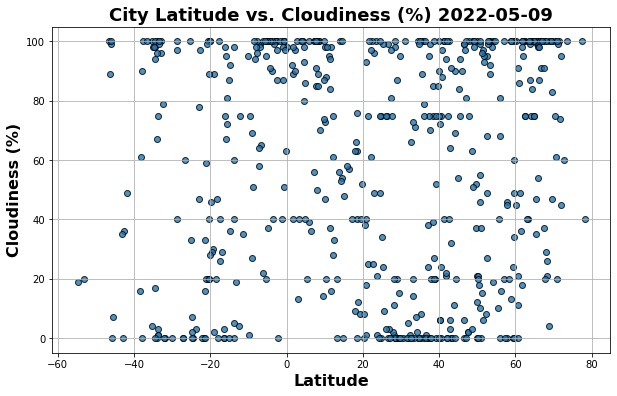

In [11]:
# Build the scatter plot for latitude vs. cloudiness
fig, ax = plt.subplots(figsize=(10,6))

ax.scatter(
    lats,
    cloudiness,
    label='Cities',
    marker='o',
    alpha=0.8,
    edgecolor='black',
    linewidths=1
)

# Incorporate the other graph properties.
ax.set_title(
    f'City Latitude vs. Cloudiness (%) '+ time.strftime('%Y-%m-%d'),
    fontsize=18,
    fontweight='bold'
)
ax.set_ylabel(
    'Cloudiness (%)',
    fontsize=16,
    fontweight='bold'
)
ax.set_xlabel(
    'Latitude',
    fontsize=16,
    fontweight='bold'
)
ax.grid()

# Save the figure.
plt.savefig(os.path.join('.','weather_data','fig3.png'))

# 6.3.4 Plot Latitude vs. Wind Speed

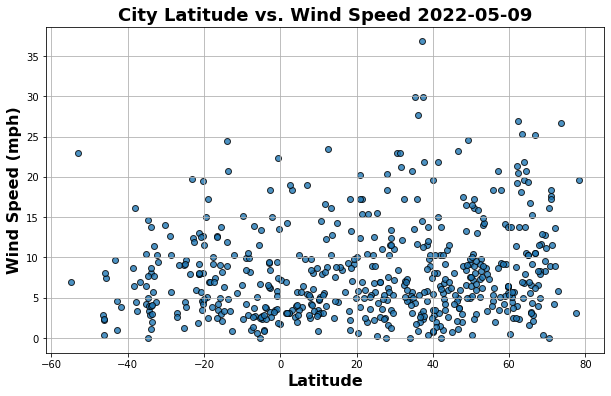

In [12]:
# Build the scatter plot for latitude vs. wind speed
fig, ax = plt.subplots(figsize=(10,6))

ax.scatter(
    lats,
    wind_speed,
    label='Cities',
    marker='o',
    alpha=0.8,
    edgecolor='black',
    linewidths=1
)

# Incorporate the other graph properties.
ax.set_title(
    f'City Latitude vs. Wind Speed '+ time.strftime('%Y-%m-%d'),
    fontsize=18,
    fontweight='bold'
)
ax.set_ylabel(
    'Wind Speed (mph)',
    fontsize=16,
    fontweight='bold'
)
ax.set_xlabel(
    'Latitude',
    fontsize=16,
    fontweight='bold'
)
ax.grid()

# Save the figure.
plt.savefig(os.path.join('.','weather_data','fig4.png'))

# 6.4.2 Find the Correlation Between Latitude and Maximum Temperature

## Create a Linear Regression Function

In [13]:
# Import linregress
from scipy.stats import linregress

In [62]:
# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates, show_r_val=False):

    # Run regression on hemisphere weather data.
    (slope, y_int, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_y_values = slope * x_values + y_int

    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(y_int,2))

    # Create a scatter plot and plot the regression line.
    fig, ax = plt.subplots()
    
    ax.scatter(x_values,y_values)
    ax.plot(
        x_values,
        regress_y_values,
        'red'
    )

    # Annotate the text for the line equation.
    ax.annotate(
        line_eq,
        text_coordinates,
        fontsize=15,
        color='red'
    )
    ax.set_title(title)
    ax.set_xlabel('Latitude')
    ax.set_ylabel(y_label)
    
    if (show_r_val):
        print(f'r-value = {r_value}.')

## Create the Hemisphere DataFrames

In [15]:
city_13 = df_city_data.loc[13]
city_13

City               Saint-Philippe
Country                        RE
Date          2022-05-08 22:00:55
Lat                      -21.3585
Lng                       55.7679
Max Temp                    71.19
Humidity                       85
Cloudiness                     33
Wind Speed                   7.99
Name: 13, dtype: object

In [24]:
df_hemi_n = df_city_data.loc[0 <= df_city_data['Lat']]
df_hemi_n.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
2,Albany,US,2022-05-08 22:00:11,42.6001,-73.9662,63.88,29,100,1.01
3,Saint George,US,2022-05-08 21:57:19,37.1041,-113.5841,84.63,10,0,36.82
4,Atikokan,CA,2022-05-08 22:00:49,48.7555,-91.6216,48.70,93,100,13.33
5,Tasiilaq,GL,2022-05-08 22:00:50,65.6145,-37.6368,37.56,69,99,3.24
6,Hilo,US,2022-05-08 21:59:03,19.7297,-155.0900,92.28,92,52,5.01


In [25]:
df_hemi_s = df_city_data.loc[df_city_data['Lat'] < 0]
df_hemi_s.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Beroroha,MG,2022-05-08 22:00:47,-21.6667,45.1667,68.68,79,0,1.86
1,Rikitea,PF,2022-05-08 22:00:47,-23.1203,-134.9692,76.37,77,78,19.69
7,Hobart,AU,2022-05-08 22:00:51,-42.8794,147.3294,42.66,88,0,4.61
8,Puerto Ayora,EC,2022-05-08 22:00:52,-0.7393,-90.3518,75.04,79,51,9.44
10,Ushuaia,AR,2022-05-08 22:00:26,-54.8000,-68.3000,37.27,83,19,6.89


## Perform Linear Regression on the Maximum Temperature for the Northern Hemisphere

r-value = -0.870350159806181.


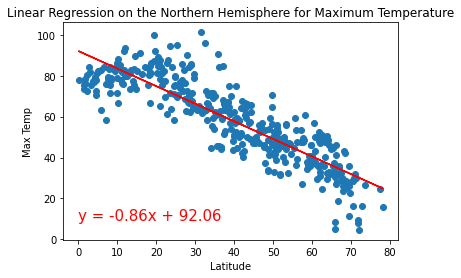

In [64]:
# Linear regression on the Northern Hemisphere
# x_values = northern_hemi_df['Lat']
# y_values = northern_hemi_df['Max Temp']

# Reminder: def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates, show_r_val):

# Call the function.
plot_linear_regression(
    df_hemi_n['Lat'],
    df_hemi_n['Max Temp'],
    'Linear Regression on the Northern Hemisphere for Maximum Temperature',
    'Max Temp',
    (0,min(df_hemi_n['Max Temp'])+5),
    True
)

r-value = 0.804217674075916.


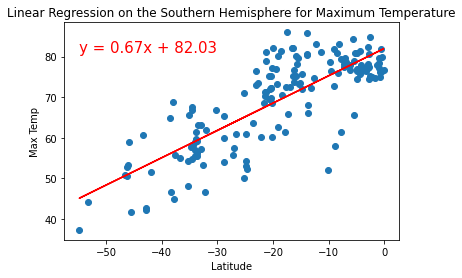

In [72]:
# Linear regression on the Southern Hemisphere
# Reminder: def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates, show_r_val):

# Call the function.
plot_linear_regression(
    df_hemi_s['Lat'],
    df_hemi_s['Max Temp'],
    'Linear Regression on the Southern Hemisphere for Maximum Temperature',
    'Max Temp',
    (min(df_hemi_s['Lat']),max(df_hemi_s['Max Temp'])-5),
    True
)

# 6.4.3 Find the Correlation Between Latitude and Percent Humidity

## Perform Linear Regression on the Percent Humidity for the Northern Hemisphere

r-value = 0.09870207953678282.


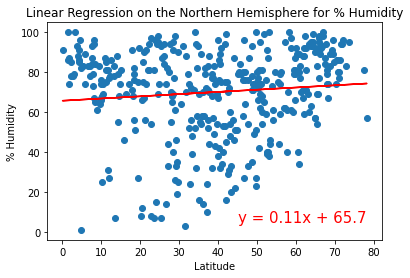

In [84]:
# Linear regression on the Northern Hemisphere
# Reminder: def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates, show_r_val):

# Call the function.
plot_linear_regression(
    df_hemi_n['Lat'],
    df_hemi_n['Humidity'],
    'Linear Regression on the Northern Hemisphere for % Humidity',
    '% Humidity',
    (45,5),
    True
)

r-value = 0.17238059670409892.


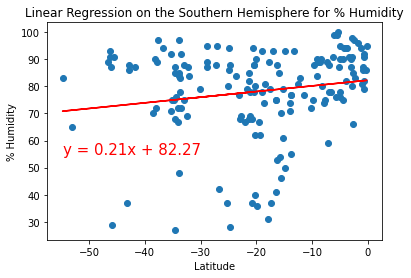

In [87]:
# Linear regression on the Southern Hemisphere
# Reminder: def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates, show_r_val):

# Call the function.
plot_linear_regression(
    df_hemi_s['Lat'],
    df_hemi_s['Humidity'],
    'Linear Regression on the Southern Hemisphere for % Humidity',
    '% Humidity',
    (min(df_hemi_s['Lat']),55),
    True
)

# 6.4.4 Find the Correlation Between Latitude and Percent Cloudiness

## Perform Linear Regression on the Percent Cloudiness for the Northern Hemisphere

r-value = 0.07690958455206164.


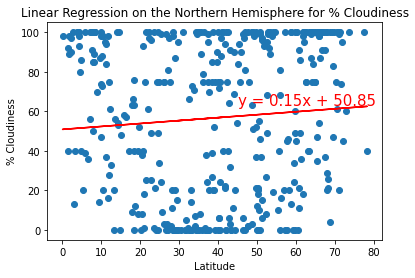

In [92]:
# Linear regression on the Northern Hemisphere
# Reminder: def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates, show_r_val):

# Call the function.
plot_linear_regression(
    df_hemi_n['Lat'],
    df_hemi_n['Cloudiness'],
    'Linear Regression on the Northern Hemisphere for % Cloudiness',
    '% Cloudiness',
    (45,63),
    True
)

## Perform Linear Regression on the Percent Cloudiness for the Southern Hemisphere

r-value = 0.26749419596438734.


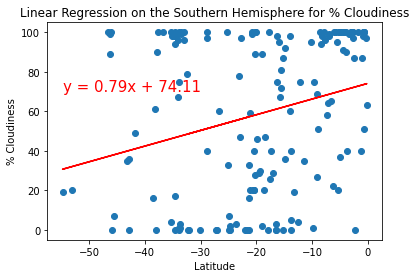

In [99]:
# Linear regression on the Southern Hemisphere
# Reminder: def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates, show_r_val):

# Call the function.
plot_linear_regression(
    df_hemi_s['Lat'],
    df_hemi_s['Cloudiness'],
    'Linear Regression on the Southern Hemisphere for % Cloudiness',
    '% Cloudiness',
    (min(df_hemi_s['Lat']),70),
    True
)

# 6.4.5 Find the Correlation Between Latitude and Wind Speed

## Perform Linear Regression on the Wind Speed for the Northern Hemisphere

r-value = 0.14938236994740234.


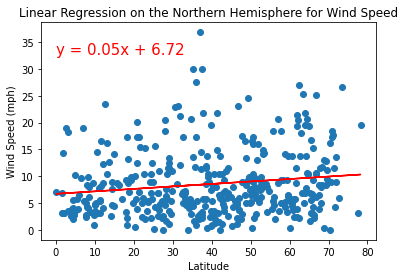

In [104]:
# Linear regression on the Northern Hemisphere
# Reminder: def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates, show_r_val):

# Call the function.
plot_linear_regression(
    df_hemi_n['Lat'],
    df_hemi_n['Wind Speed'],
    'Linear Regression on the Northern Hemisphere for Wind Speed',
    'Wind Speed (mph)',
    (0,max(df_hemi_n['Wind Speed'])-4),
    True
)

## Perform Linear Regression on the Wind Speed for the Southern Hemisphere

r-value = -0.025979342493380488.


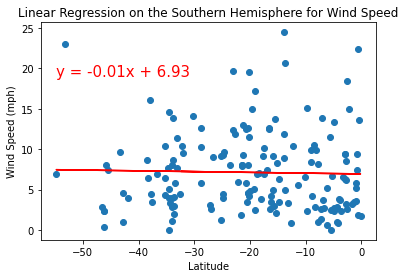

In [107]:
# Linear regression on the Southern Hemisphere
# Reminder: def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates, show_r_val):

# Call the function.
plot_linear_regression(
    df_hemi_s['Lat'],
    df_hemi_s['Wind Speed'],
    'Linear Regression on the Southern Hemisphere for Wind Speed',
    'Wind Speed (mph)',
    (min(df_hemi_s['Lat']),19),
    True
)